In [3]:
import pandas as pd
import numpy as np
# import clustering
from sklearn.cluster import KMeans,DBSCAN, MeanShift, SpectralClustering,AffinityPropagation, Birch,MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# t-SNE visualization
from sklearn.manifold import TSNE

# imputation
from sklearn.impute import KNNImputer

# Scaling
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:


# import dataset 
data = pd.read_csv('CC GENERAL.csv',delimiter=',')

data.head()



# import cluste

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.isna().sum()
# drop the CUST_ID column
data.drop('CUST_ID',axis=1,inplace=True)

C:\Users\enzoh\AppData\Local\Temp\ipykernel_5228\3239180250.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\enzoh\AppData\Local\Temp\ipykernel_5228\3239180250.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\enzoh\AppData\Local\Temp\ipykernel_5228\3

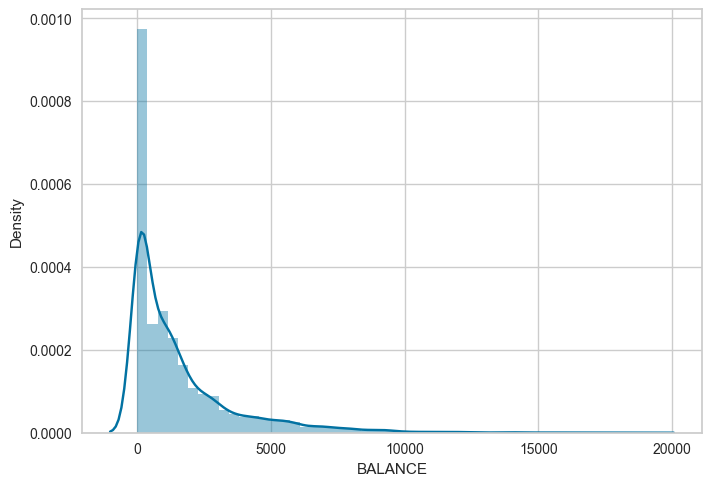

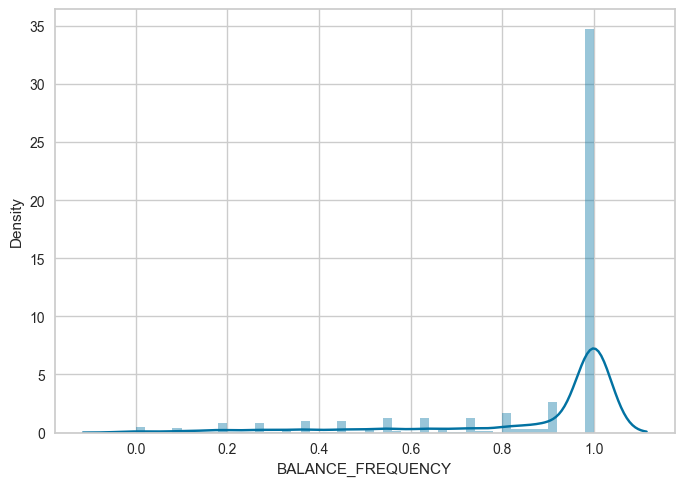

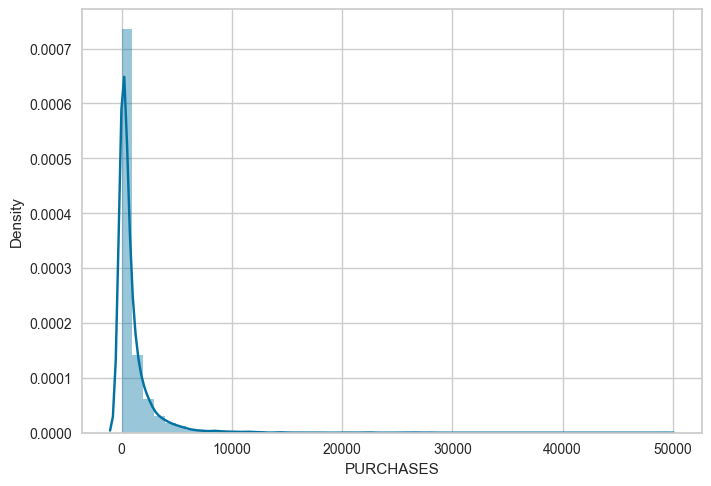

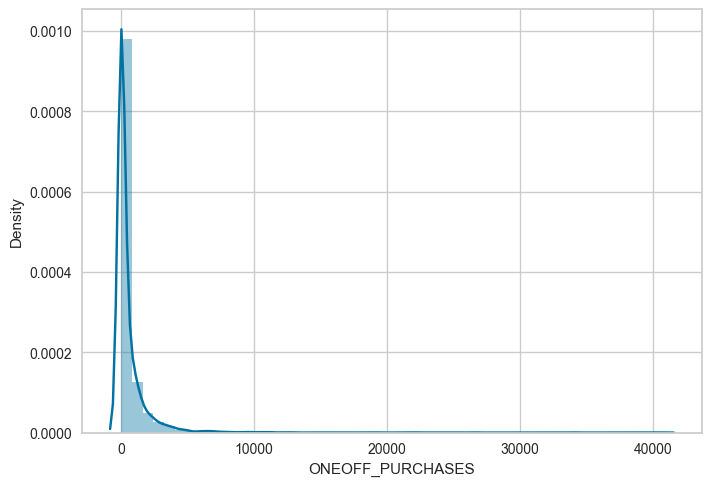

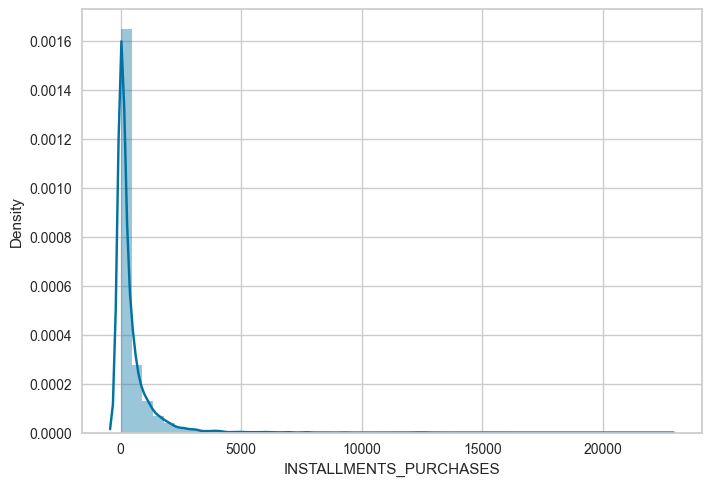

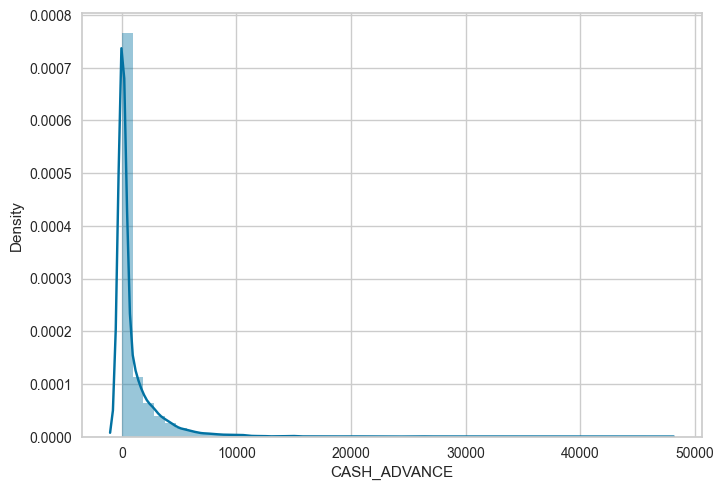

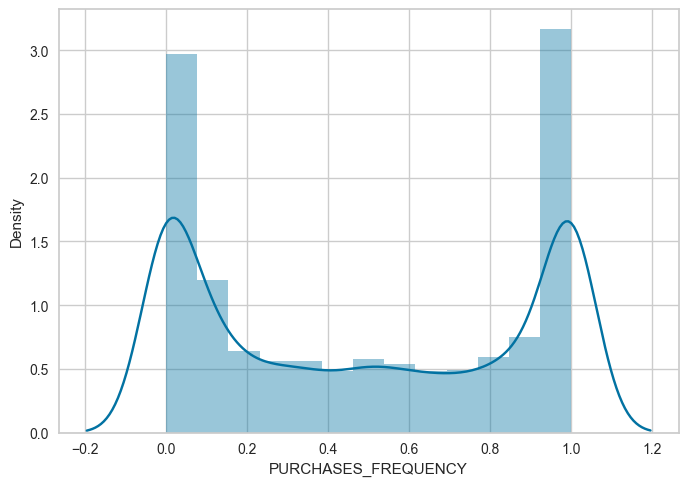

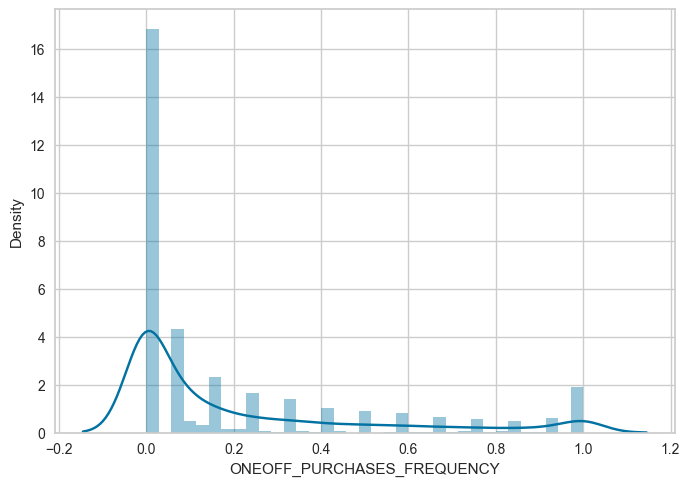

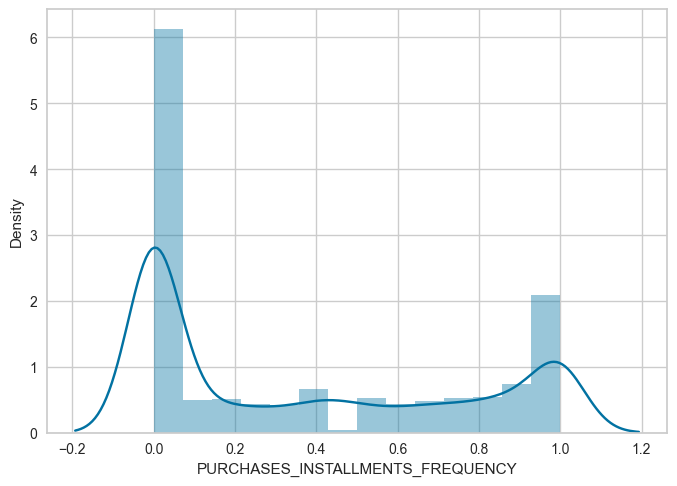

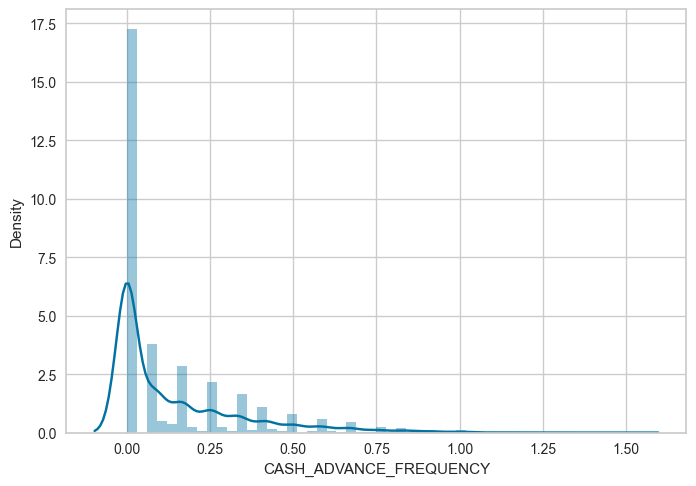

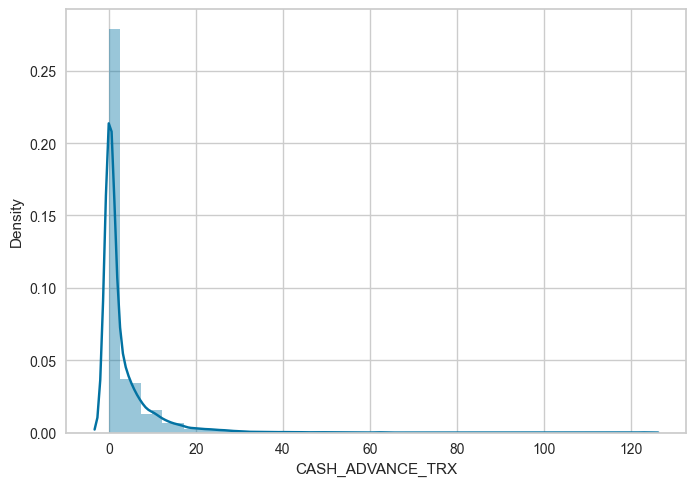

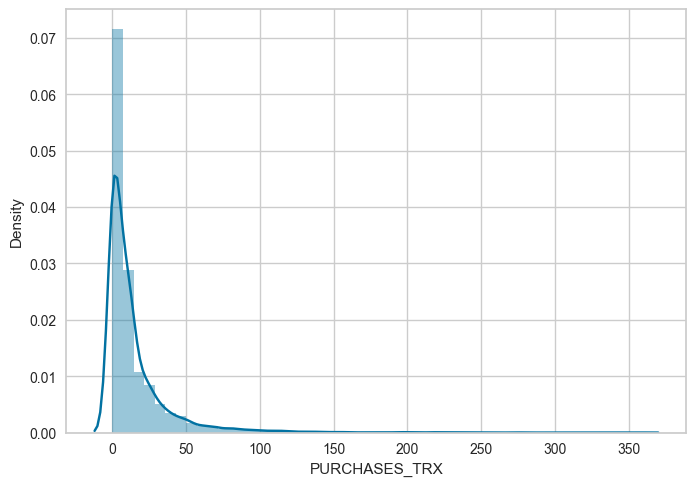

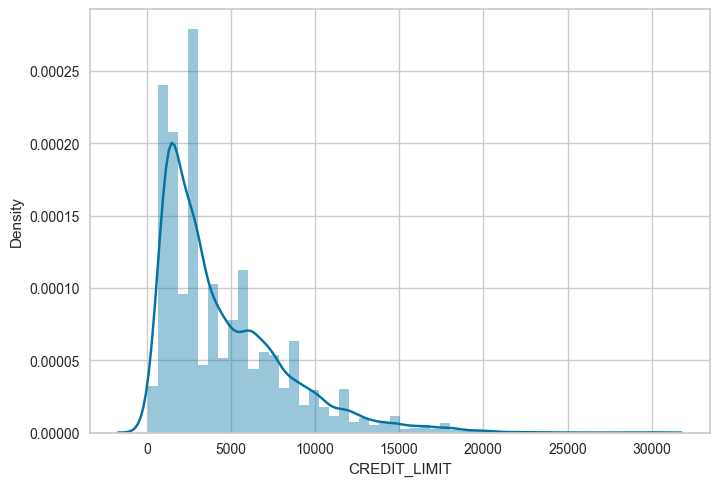

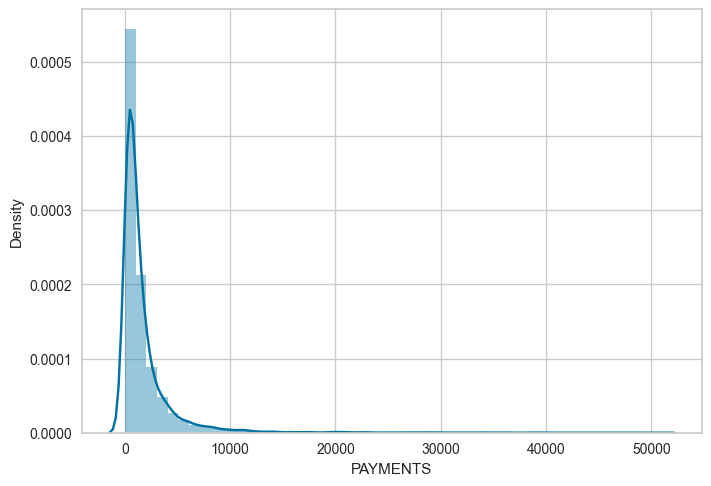

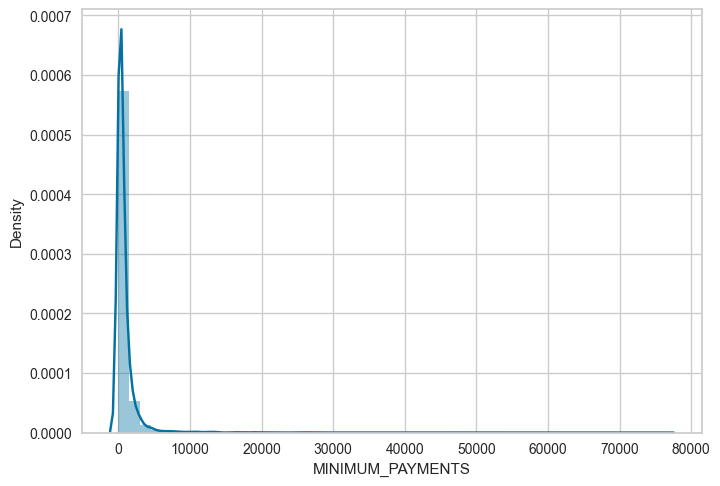

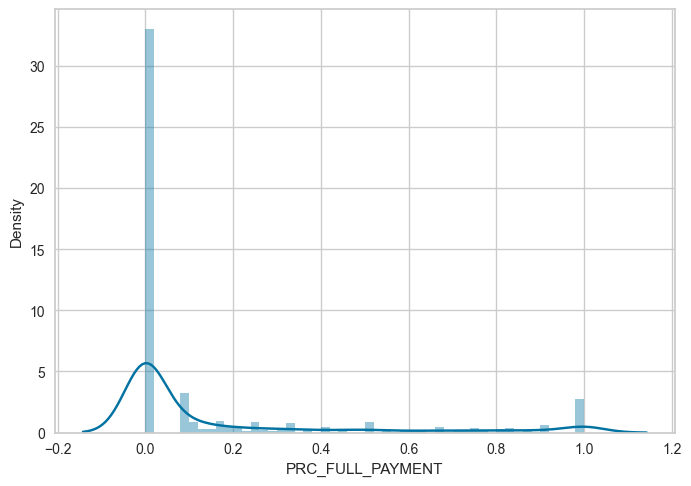

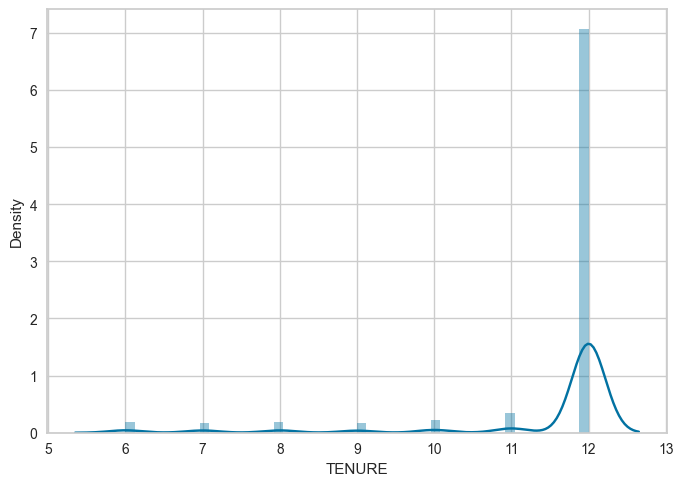

In [7]:
# visualize repartition of data for each feature
for col in data.columns:
    plt.figure()
    sns.distplot(data[col])



In [8]:
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
# see if there are null or missing values
data.isna().sum()


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# handle missing values with mean of the column
data.fillna(data.mean(),inplace=True)




# normalize data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data.head(5)
data.describe()








,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.540488e-17,1.587805e-16,3.175610e-18,-6.033659e-17,3.175610e-17,-6.351220e-18,9.328354e-17,1.905366e-17,5.716098e-17,-1.595744e-16,-1.746585e-17,-1.905366e-17,2.032390e-16,-2.540488e-17,2.699268e-17,-9.526830e-18,2.921561e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221536e+00,-5.986883e-01,-3.708230e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.955261e-01,-4.662913e-01,-2.975162e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.107426e-01,-3.026846e-01,-2.268130e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512163e-01,5.802976e-02,4.878305e-17,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010083e+00,1.692228e+01,3.241509e+01,2.893453e+00,3.606795e-01


In [11]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

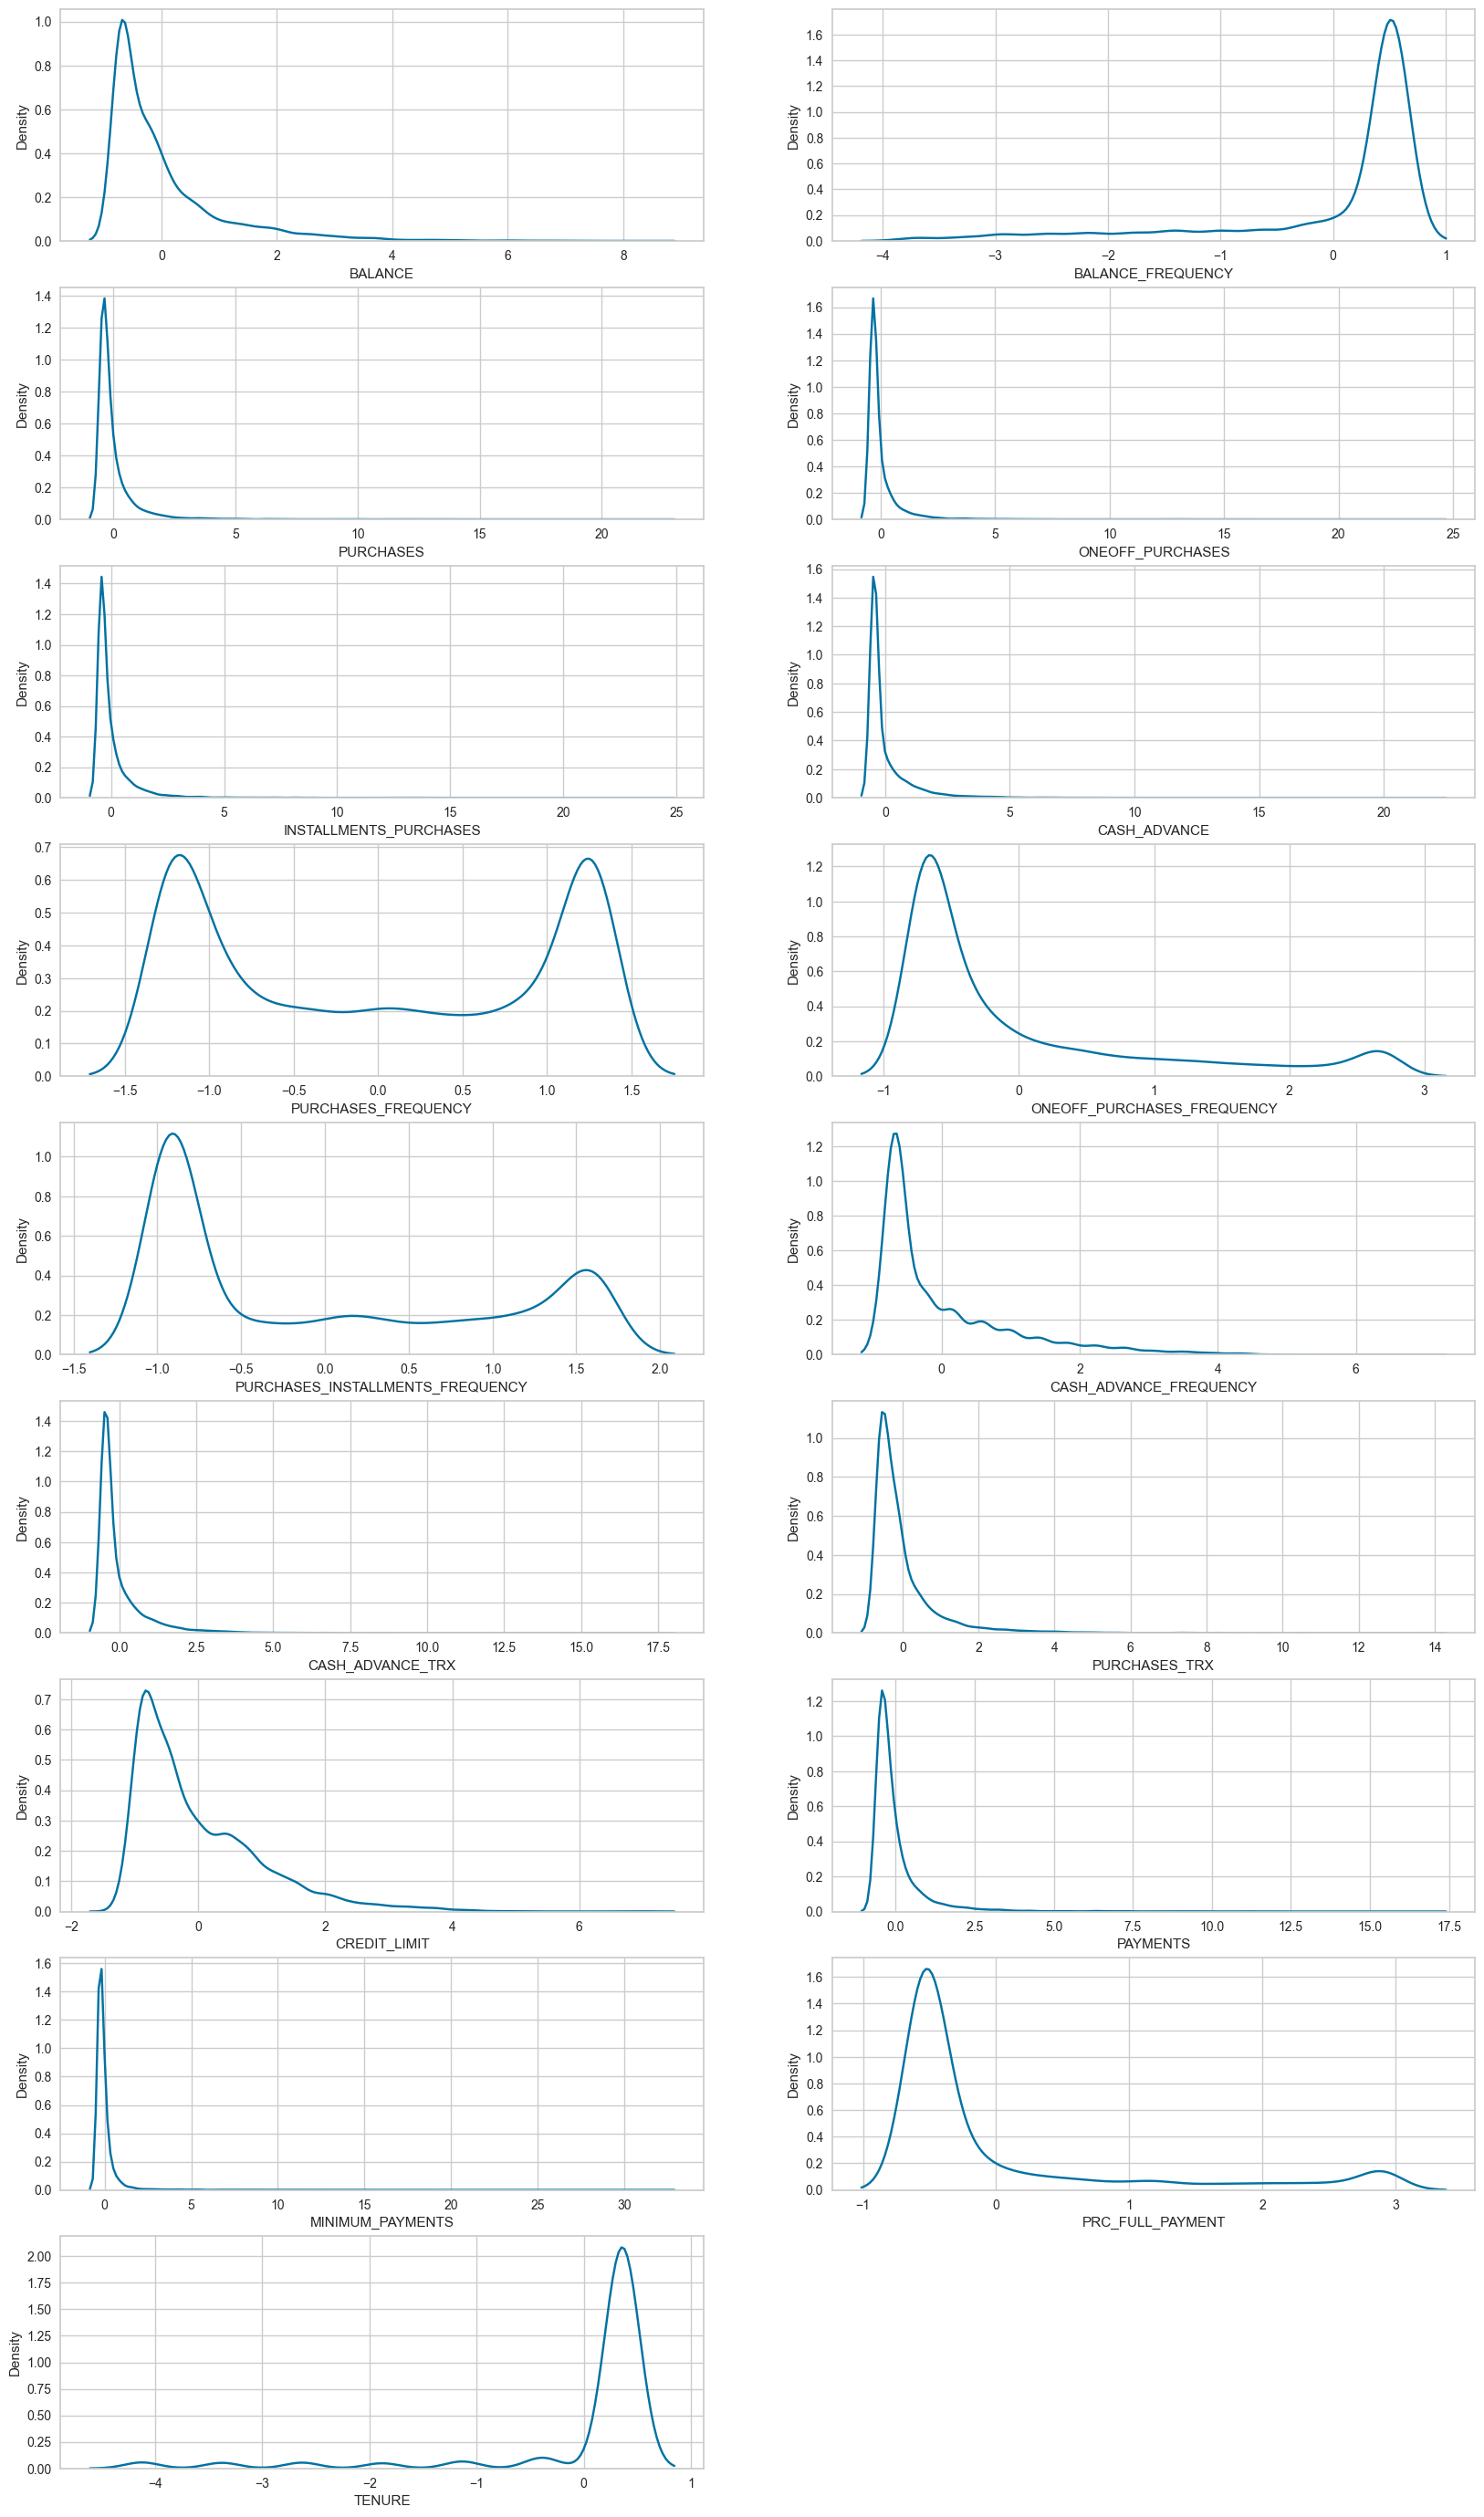

In [12]:
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

<AxesSubplot: >

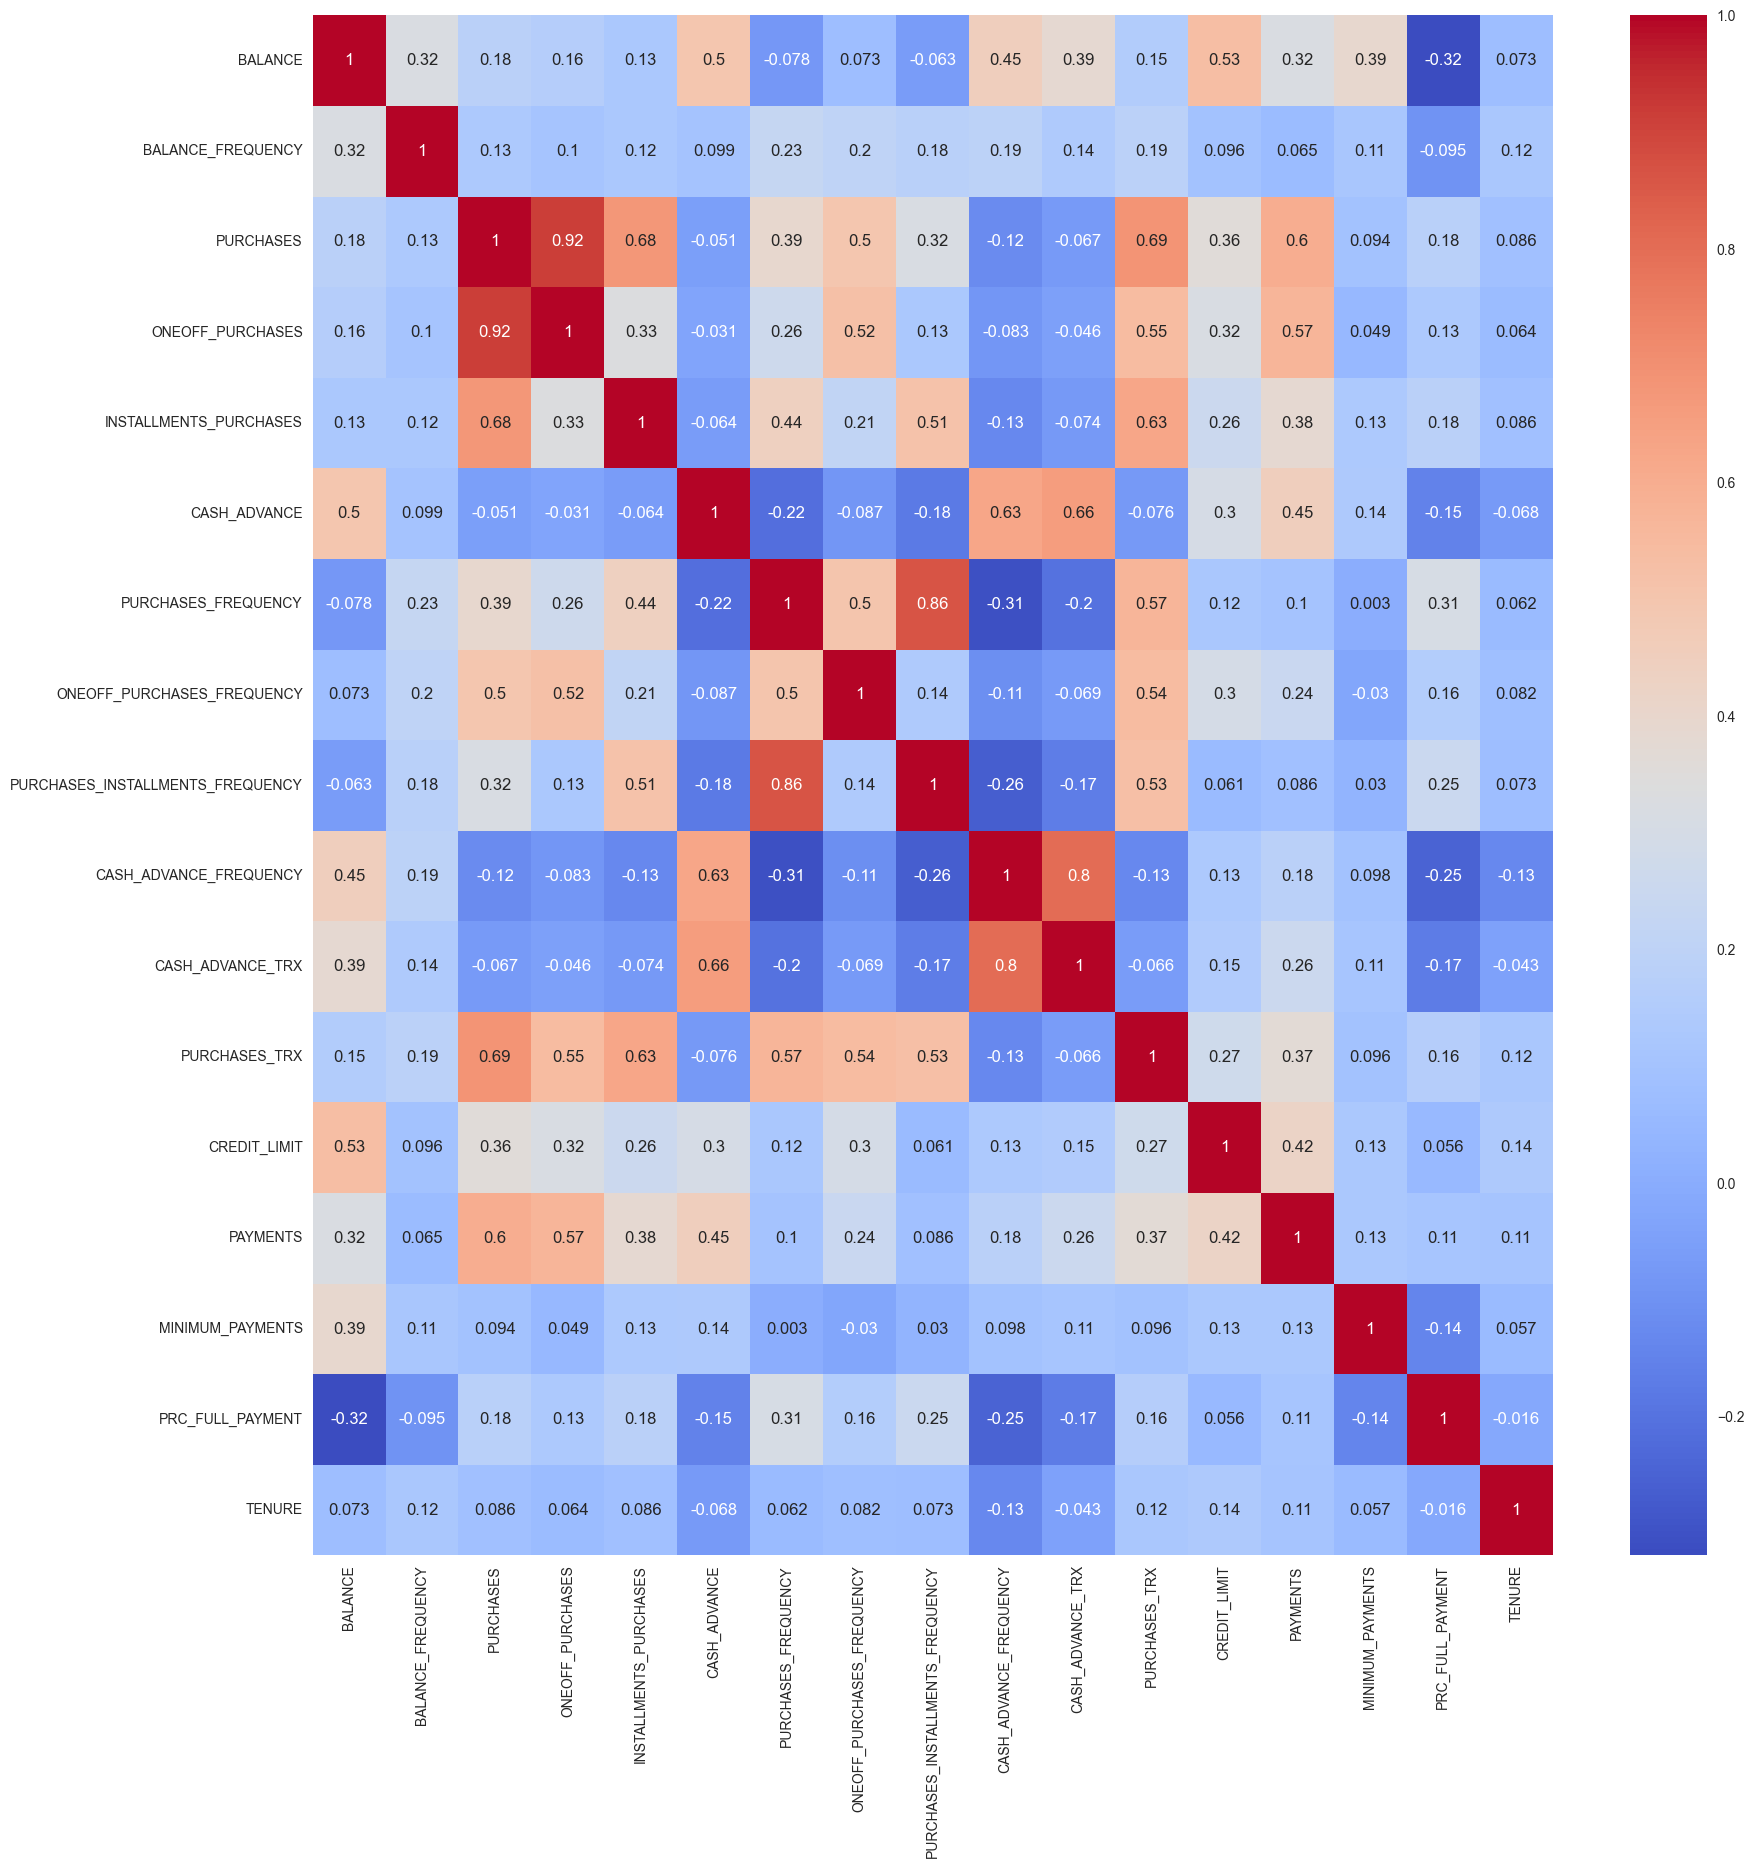

In [13]:
# plot heatmap to see correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')



In [14]:
# save columns names for an ndarray
columns = data.columns


# reduce dimensionality with PCA witj 90% of variance and keep columns names
pca = PCA(n_components=0.95)
pca.fit(data)
pca_column_name = [f'pca_{i}' for i in range(pca.n_components_)]
data = pd.DataFrame(pca.fit_transform(data),columns=pca_column_name)
data.head(5)





,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,0.115340,-0.077774,-0.235181,-0.053886
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0.687878,-0.777671,-0.871437,-0.601855
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548,-0.883727,-0.001939,-0.761725,0.684204
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099,-0.146564,0.393144,0.744858,0.149804
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399,0.584619,-0.121734,-0.455097,-0.106243


In [15]:
columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<AxesSubplot: >

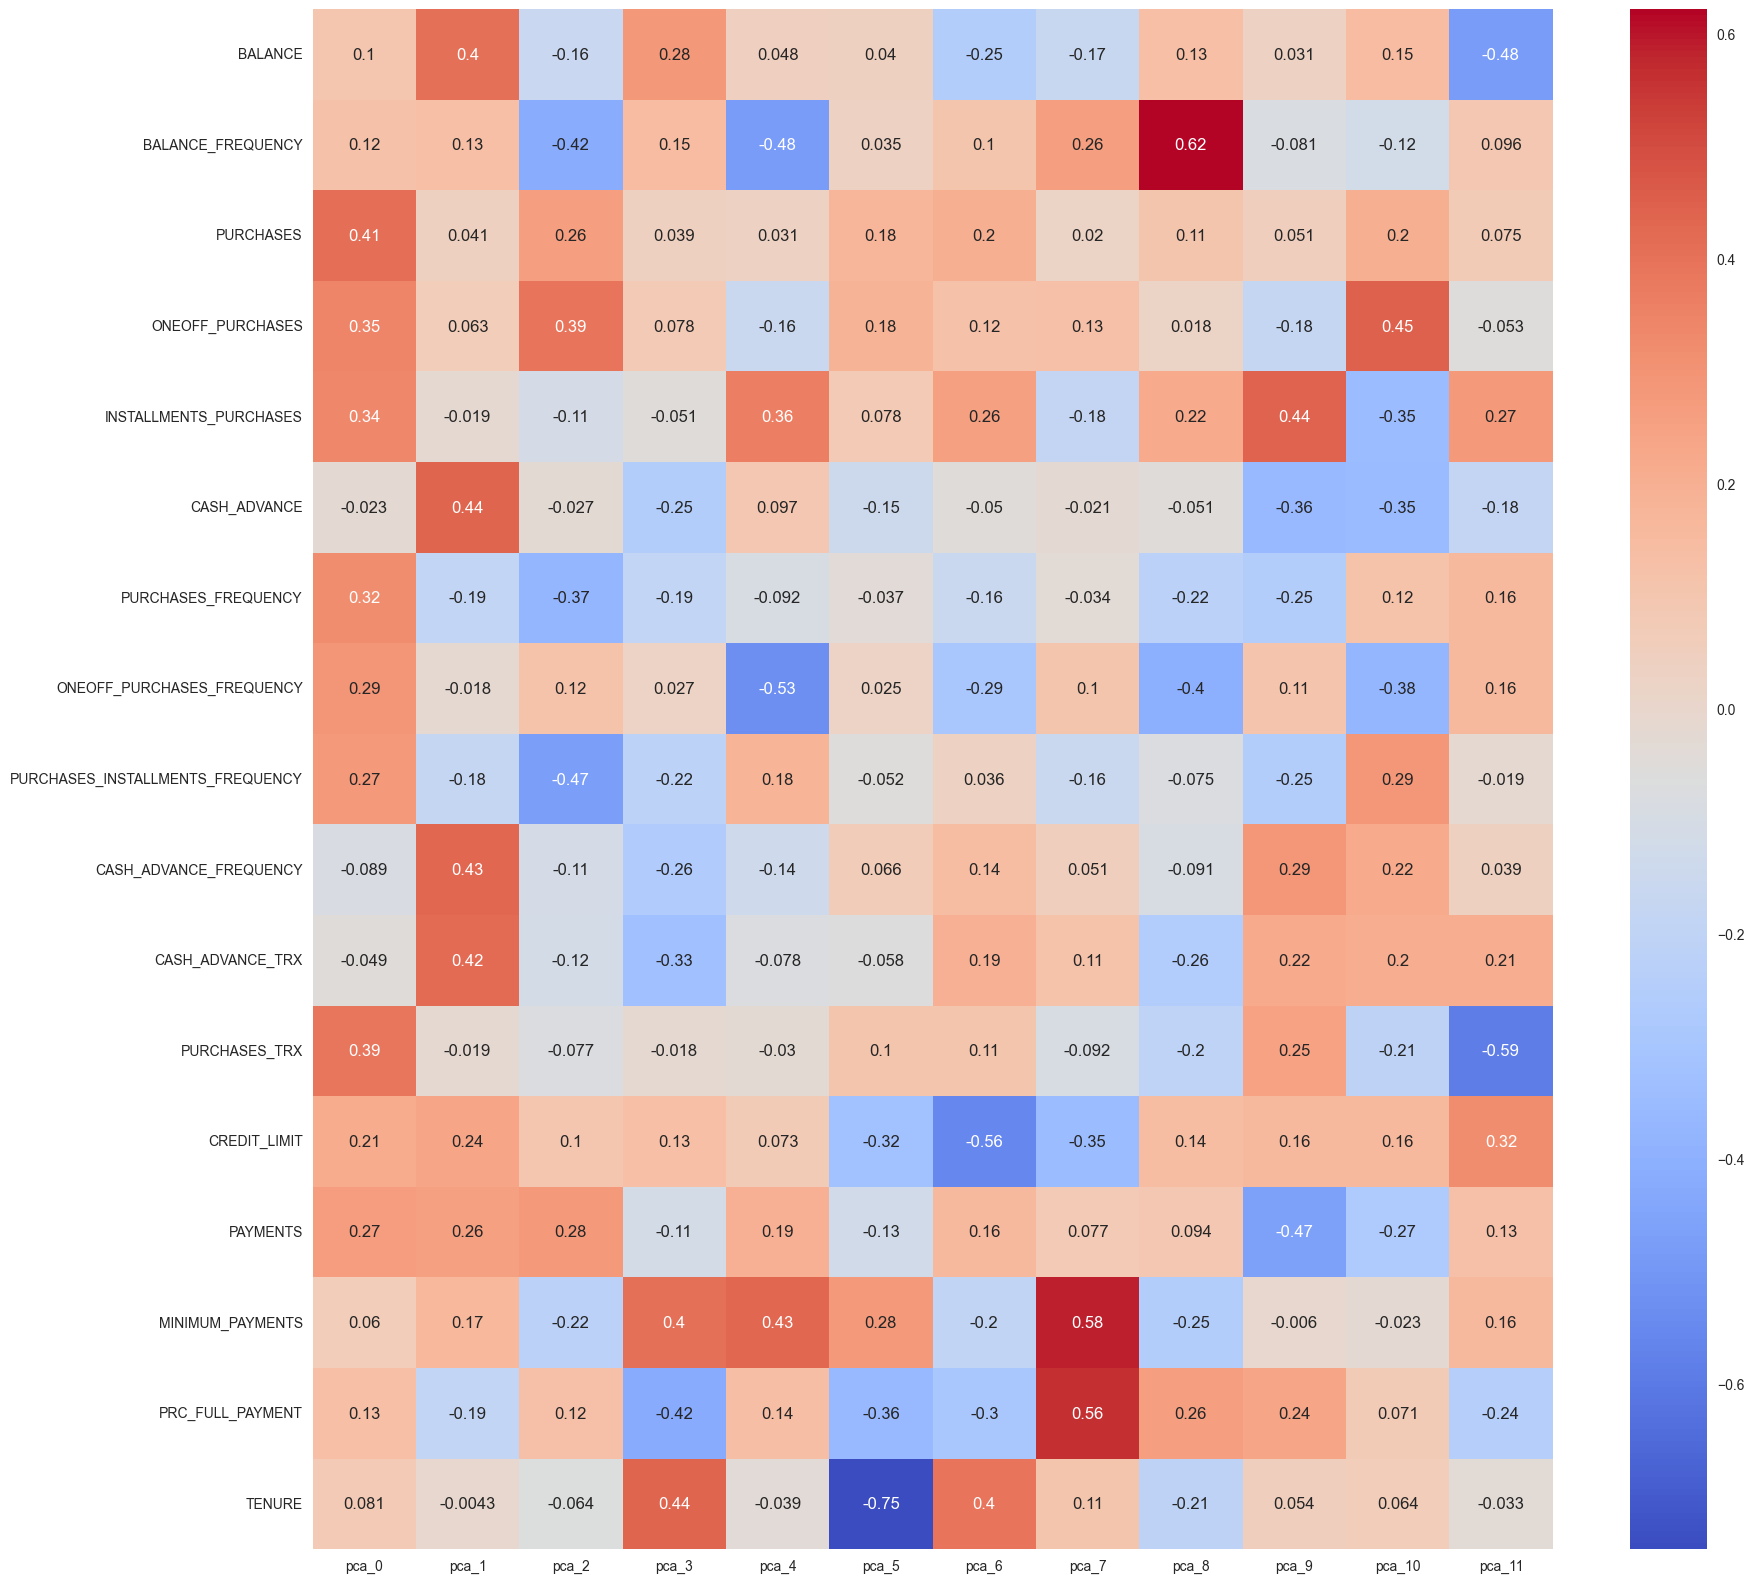

In [16]:
# heat map between pca components as y axis and features as x axis
plt.figure(figsize=(20,20))
sns.heatmap(pca.components_.T,annot=True,cmap='coolwarm',xticklabels=pca_column_name,yticklabels=columns)


# Clustering

## Kmeans

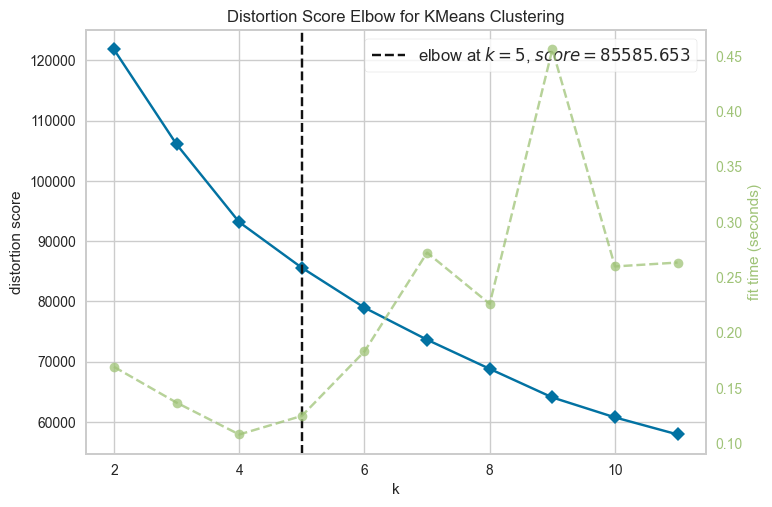

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# find the best number of clusters with elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(data)
visualizer.show()


In [18]:
original = pd.read_csv('CC GENERAL.csv',delimiter=',')
original.drop('CUST_ID',axis=1,inplace=True)
original.fillna(original.mean(),inplace=True)
# normalize data
scaler = StandardScaler()
original = pd.DataFrame(scaler.fit_transform(original),columns=original.columns)
original.head(5)
original.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.540488e-17,1.587805e-16,3.175610e-18,-6.033659e-17,3.175610e-17,-6.351220e-18,9.328354e-17,1.905366e-17,5.716098e-17,-1.595744e-16,-1.746585e-17,-1.905366e-17,2.032390e-16,-2.540488e-17,2.699268e-17,-9.526830e-18,2.921561e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221536e+00,-5.986883e-01,-3.708230e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.955261e-01,-4.662913e-01,-2.975162e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.107426e-01,-3.026846e-01,-2.268130e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512163e-01,5.802976e-02,4.878305e-17,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010083e+00,1.692228e+01,3.241509e+01,2.893453e+00,3.606795e-01


In [19]:
# make model for k = 5
model = KMeans(n_clusters=5)
model.fit(original)
data['cluster'] = model.labels_
original['cluster'] = model.labels_
data.head(5)



# see cluster foe PURCHASES vs CASH_ADVANCE, and PURCHASES vs PURCHASES_FREQUENCY and purchases vs balance with rainbow colors and make it square
# use original dataset to see the real values
# join plot fils de pute
"""sns.jointplot(x='PURCHASES',y='CASH_ADVANCE',data=original,hue='cluster',height=10)
sns.jointplot(x='PURCHASES',y='PURCHASES_FREQUENCY',data=original,hue='cluster',height=10)
sns.jointplot(x='PURCHASES',y='BALANCE',data=original,hue='cluster',height=10)
"""




"sns.jointplot(x='PURCHASES',y='CASH_ADVANCE',data=original,hue='cluster',height=10)\nsns.jointplot(x='PURCHASES',y='PURCHASES_FREQUENCY',data=original,hue='cluster',height=10)\nsns.jointplot(x='PURCHASES',y='BALANCE',data=original,hue='cluster',height=10)\n"

<AxesSubplot: xlabel='PURCHASES', ylabel='BALANCE'>

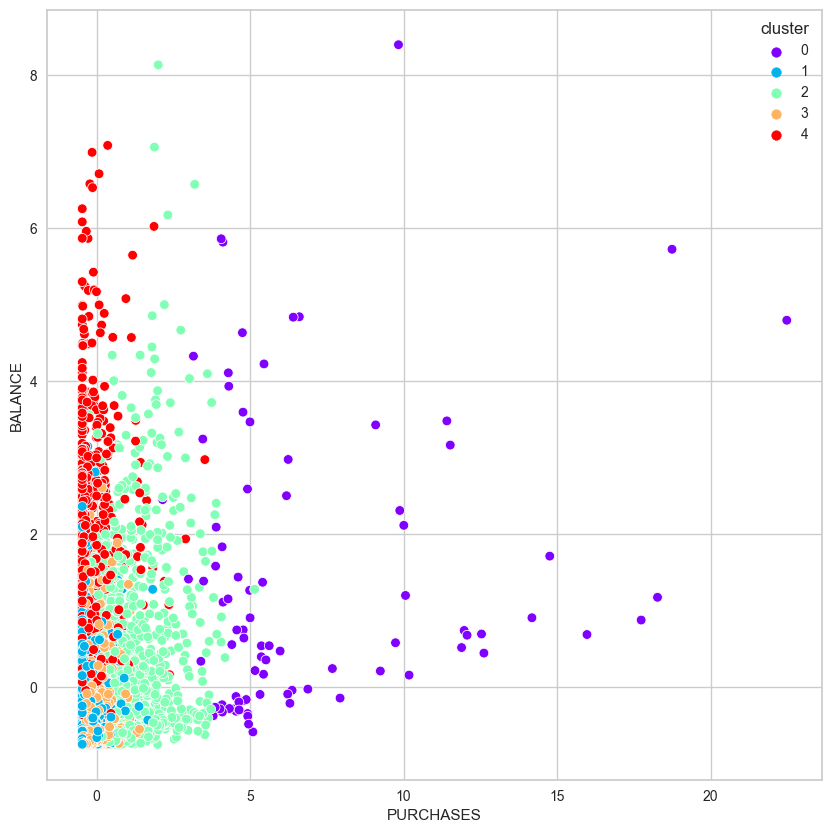

In [20]:
# plot PUushar vs balance with cloud of points and color for each cluster
plt.figure(figsize=(10,10))
sns.scatterplot(x='PURCHASES',y='BALANCE',data=original,hue='cluster',palette='rainbow')


In [21]:
def spider_plot(data, title):
    means = data.groupby("cluster").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()

In [22]:
print(len(original))
# see number of columns


8950


# hierarchical clustering

In [ ]:
# hierarchical clustering
# make dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(original, 'single')
labelList = range(1, 8951)

import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method= 'ward', metric= 'euclidean'))
# selecting 2 categories

from sklearn.cluster import AgglomerativeClustering
D_cluster = AgglomerativeClustering(n_clusters= 2)

X_D=D_cluster.fit(X)
Y_pred_D = D_cluster.fit_predict(X)